In [103]:
import matplotlib.pyplot as plt
import numpy as np
import random
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma=0.9

Error: Cannot re-register id: D4x4-FrozenLake-v0

In [109]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
V_global=[]
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [110]:
def norm_diff(V1,V2):
    A=np.sum(np.fabs(V1- V2))
    return A

def ValueIteration(env,gamma):
    global V_global
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    
    V=np.zeros(16)
    V_old=np.zeros(16)
    Policy =np.random.randint(0,3,16)
    while True: #Make it true
        V_old=np.copy(V)
        for x in range(env.nS):
            tmax=0.0
            ta=0
            for a in range(env.nA):
                tsum=0.0
                for y in range(env.nS):
                    tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
                if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                    tmax=tsum
                    ta=a
                if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                    ta=a
                    tmax=tsum
                tsum=0.0
            Policy[x]=ta
            V[x] = tmax # Assign the maximum Value to the Value Function
        Plt_list.append(norm_diff(V_old,V))
        plt.plot(Plt_list, 'ro')
        if norm_diff(V_old,V) < delta:
            print(Policy)
            fancy_visual(V,Policy)
            V_global=V
            return Policy
        
    # By now, I have old Value Function - V1 and new Value Function V
    
    
    
    # For Plotting
    

In [106]:
Q = np.zeros((env.nS, env.nA))

In [107]:
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

Epsilon : 1.0
Epsilon : 0.9950623544007555
Epsilon : 0.9901493354116764
Epsilon : 0.985260820207032
Epsilon : 0.9803966865736877
Epsilon : 0.9755568129080493
Epsilon : 0.970741078213023
Epsilon : 0.9659493620949908
Epsilon : 0.9611815447608
Epsilon : 0.9564375070147689
Epsilon : 0.9517171302557069
Epsilon : 0.947020296473949
Epsilon : 0.9423468882484062
Epsilon : 0.9376967887436294
Epsilon : 0.9330698817068888
Epsilon : 0.9284660514652673
Epsilon : 0.9238851829227694
Epsilon : 0.9193271615574428
Epsilon : 0.9147918734185159
Epsilon : 0.9102792051235491
Epsilon : 0.9057890438555999
Epsilon : 0.9013212773604029
Epsilon : 0.896875793943563
Epsilon : 0.892452482467763
Epsilon : 0.888051232349986
Epsilon : 0.8836719335587495
Epsilon : 0.8793144766113556
Epsilon : 0.8749787525711541
Epsilon : 0.8706646530448178
Epsilon : 0.8663720701796339
Epsilon : 0.8621008966608072
Epsilon : 0.8578510257087774
Epsilon : 0.8536223510765493
Epsilon : 0.8494147670470367
Epsilon : 0.8452281684304199
Epsilon :

Epsilon : 0.1522669102799259
Epsilon : 0.15155735110471197
Epsilon : 0.15085133087064845
Epsilon : 0.1501488319271927
Epsilon : 0.14944983671183457
Epsilon : 0.14875432774965722
Epsilon : 0.14806228765290044
Epsilon : 0.1473736991205257
Epsilon : 0.1466885449377839
Epsilon : 0.1460068079757847
Epsilon : 0.14532847119106862
Epsilon : 0.14465351762518067
Epsilon : 0.1439819304042466
Epsilon : 0.1433136927385508
Epsilon : 0.14264878792211688
Epsilon : 0.14198719933228987
Epsilon : 0.1413289104293205
Epsilon : 0.14067390475595193
Epsilon : 0.14002216593700811
Epsilon : 0.1393736776789848
Epsilon : 0.13872842376964165
Epsilon : 0.13808638807759738
Epsilon : 0.1374475545519262
Epsilon : 0.13681190722175668
Epsilon : 0.13617943019587256
Epsilon : 0.13555010766231515
Epsilon : 0.13492392388798838
Epsilon : 0.13430086321826523
Epsilon : 0.13368091007659658
Epsilon : 0.13306404896412158
Epsilon : 0.1324502644592803
Epsilon : 0.13183954121742802
Epsilon : 0.13123186397045208
Epsilon : 0.130627217

Epsilon : 0.04158571442218188
Epsilon : 0.04142818001428726
Epsilon : 0.04127143131252988
Epsilon : 0.04111546439818403
Epsilon : 0.04096027537206874
Epsilon : 0.04080586035445025
Epsilon : 0.04065221548494511
Epsilon : 0.040499336922423565
Epsilon : 0.04034722084491359
Epsilon : 0.040195863449505306
Epsilon : 0.04004526095225598
Epsilon : 0.039895409588095315
Epsilon : 0.039746305610731406
Epsilon : 0.039597945292557044
Epsilon : 0.03945032492455657
Epsilon : 0.03930344081621308
Epsilon : 0.03915728929541622
Epsilon : 0.03901186670837034
Epsilon : 0.03886716941950322
Epsilon : 0.03872319381137508
Epsilon : 0.03857993628458824
Epsilon : 0.03843739325769703
Epsilon : 0.038295561167118394
Epsilon : 0.03815443646704266
Epsilon : 0.038014015629344984
Epsilon : 0.03787429514349709
Epsilon : 0.03773527151647959
Epsilon : 0.03759694127269454
Epsilon : 0.037459300953878664
Epsilon : 0.037322347119016795
Epsilon : 0.037186076344255935
Epsilon : 0.03705048522281963
Epsilon : 0.03691557036492278


Epsilon : 0.012417429880905597
Epsilon : 0.01240537289907435
Epsilon : 0.012393376051690858
Epsilon : 0.012381439038833314
Epsilon : 0.012369561562075776
Epsilon : 0.012357743324480702
Epsilon : 0.01234598403059154
Epsilon : 0.01233428338642533
Epsilon : 0.012322641099465358
Epsilon : 0.012311056878653841
Epsilon : 0.012299530434384661
Epsilon : 0.012288061478496108
Epsilon : 0.012276649724263688
Epsilon : 0.012265294886392948
Epsilon : 0.012253996681012354
Epsilon : 0.01224275482566618
Epsilon : 0.012231569039307458
Epsilon : 0.012220439042290943
Epsilon : 0.012209364556366138
Epsilon : 0.012198345304670311
Epsilon : 0.012187381011721598
Epsilon : 0.012176471403412107
Epsilon : 0.012165616207001056
Epsilon : 0.012154815151107974
Epsilon : 0.0121440679657059
Epsilon : 0.012133374382114637
Epsilon : 0.012122734132994042
Epsilon : 0.012112146952337331
Epsilon : 0.012101612575464436
Epsilon : 0.012091130739015387
Epsilon : 0.012080701180943726
Epsilon : 0.012070323640509958
Epsilon : 0.01

Epsilon : 0.01021282286970491
Epsilon : 0.010211761411213984
Epsilon : 0.010210705246769368
Epsilon : 0.010209654349966894
Epsilon : 0.010208608694534091
Epsilon : 0.010207568254329514
Epsilon : 0.010206533003342108
Epsilon : 0.01020550291569054
Epsilon : 0.01020447796562257
Epsilon : 0.010203458127514388
Epsilon : 0.010202443375869993
Epsilon : 0.010201433685320538
Epsilon : 0.010200429030623707
Epsilon : 0.010199429386663081
Epsilon : 0.010198434728447508
Epsilon : 0.010197445031110482
Epsilon : 0.010196460269909516
Epsilon : 0.010195480420225531
Epsilon : 0.010194505457562234
Epsilon : 0.010193535357545505
Epsilon : 0.010192570095922796
Epsilon : 0.010191609648562514
Epsilon : 0.010190653991453425
Epsilon : 0.010189703100704052
Epsilon : 0.010188756952542078
Epsilon : 0.01018781552331375
Epsilon : 0.010186878789483284
Epsilon : 0.01018594672763229
Epsilon : 0.010185019314459172
Epsilon : 0.010184096526778551
Epsilon : 0.010183178341520688
Epsilon : 0.010182264735730903
Epsilon : 0.0

Epsilon : 0.010020706760105677
Epsilon : 0.010020603484708799
Epsilon : 0.010020500724400111
Epsilon : 0.0100203984766106
Epsilon : 0.010020296738784067
Epsilon : 0.01002019550837706
Epsilon : 0.010020094782858816
Epsilon : 0.010019994559711188
Epsilon : 0.010019894836428596
Epsilon : 0.01001979561051795
Epsilon : 0.010019696879498599
Epsilon : 0.01001959864090226
Epsilon : 0.010019500892272964
Epsilon : 0.010019403631166992
Epsilon : 0.010019306855152808
Epsilon : 0.01001921056181101
Epsilon : 0.010019114748734258
Epsilon : 0.01001901941352722
Epsilon : 0.01001892455380651
Epsilon : 0.01001883016720063
Epsilon : 0.010018736251349912
Epsilon : 0.010018642803906453
Epsilon : 0.010018549822534063
Epsilon : 0.010018457304908203
Epsilon : 0.010018365248715926
Epsilon : 0.010018273651655822
Epsilon : 0.010018182511437964
Epsilon : 0.010018091825783837
Epsilon : 0.0100180015924263
Epsilon : 0.010017911809109508
Epsilon : 0.010017822473588877
Epsilon : 0.010017733583631014
Epsilon : 0.0100176

Epsilon : 0.0100025739977167
Epsilon : 0.010002561159849531
Epsilon : 0.01000254838601149
Epsilon : 0.010002535675883233
Epsilon : 0.010002523029147005
Epsilon : 0.010002510445486636
Epsilon : 0.010002497924587536
Epsilon : 0.010002485466136682
Epsilon : 0.010002473069822607
Epsilon : 0.01000246073533541
Epsilon : 0.010002448462366724
Epsilon : 0.010002436250609724
Epsilon : 0.010002424099759115
Epsilon : 0.010002412009511128
Epsilon : 0.010002399979563504
Epsilon : 0.010002388009615493
Epsilon : 0.010002376099367848
Epsilon : 0.010002364248522811
Epsilon : 0.01000235245678411
Epsilon : 0.01000234072385695
Epsilon : 0.01000232904944801
Epsilon : 0.010002317433265427
Epsilon : 0.010002305875018797
Epsilon : 0.01000229437441916
Epsilon : 0.010002282931179005
Epsilon : 0.010002271545012249
Epsilon : 0.010002260215634235
Epsilon : 0.01000224894276173
Epsilon : 0.010002237726112912
Epsilon : 0.010002226565407363
Epsilon : 0.010002215460366065
Epsilon : 0.010002204410711391
Epsilon : 0.01000

Epsilon : 0.010000293892925227
Epsilon : 0.010000292427128148
Epsilon : 0.01000029096864176
Epsilon : 0.010000289517429607
Epsilon : 0.010000288073455401
Epsilon : 0.010000286636683049
Epsilon : 0.010000285207076628
Epsilon : 0.010000283784600399
Epsilon : 0.010000282369218799
Epsilon : 0.010000280960896446
Epsilon : 0.010000279559598129
Epsilon : 0.010000278165288815
Epsilon : 0.01000027677793365
Epsilon : 0.010000275397497947
Epsilon : 0.010000274023947195
Epsilon : 0.010000272657247058
Epsilon : 0.010000271297363365
Epsilon : 0.010000269944262119
Epsilon : 0.010000268597909496
Epsilon : 0.010000267258271833
Epsilon : 0.010000265925315641
Epsilon : 0.010000264599007597
Epsilon : 0.01000026327931454
Epsilon : 0.010000261966203482
Epsilon : 0.01000026065964159
Epsilon : 0.010000259359596204
Epsilon : 0.010000258066034821
Epsilon : 0.010000256778925104
Epsilon : 0.010000255498234871
Epsilon : 0.010000254223932109
Epsilon : 0.010000252955984957
Epsilon : 0.010000251694361719
Epsilon : 0.

Epsilon : 0.010000034925439917
Epsilon : 0.010000034751248558
Epsilon : 0.010000034577925983
Epsilon : 0.010000034405467857
Epsilon : 0.010000034233869871
Epsilon : 0.010000034063127732
Epsilon : 0.010000033893237174
Epsilon : 0.010000033724193948
Epsilon : 0.01000003355599383
Epsilon : 0.010000033388632612
Epsilon : 0.010000033222106111
Epsilon : 0.010000033056410167
Epsilon : 0.010000032891540634
Epsilon : 0.01000003272749339
Epsilon : 0.010000032564264336
Epsilon : 0.01000003240184939
Epsilon : 0.010000032240244492
Epsilon : 0.010000032079445602
Epsilon : 0.010000031919448699
Epsilon : 0.010000031760249785
Epsilon : 0.010000031601844877
Epsilon : 0.010000031444230019
Epsilon : 0.010000031287401267
Epsilon : 0.010000031131354703
Epsilon : 0.010000030976086424
Epsilon : 0.010000030821592547
Epsilon : 0.010000030667869213
Epsilon : 0.010000030514912578
Epsilon : 0.010000030362718817
Epsilon : 0.010000030211284124
Epsilon : 0.010000030060604716
Epsilon : 0.010000029910676824
Epsilon : 0

Epsilon : 0.010000004150444766
Epsilon : 0.010000004129744337
Epsilon : 0.010000004109147151
Epsilon : 0.010000004088652694
Epsilon : 0.010000004068260454
Epsilon : 0.01000000404796992
Epsilon : 0.010000004027780587
Epsilon : 0.010000004007691946
Epsilon : 0.0100000039877035
Epsilon : 0.010000003967814745
Epsilon : 0.010000003948025186
Epsilon : 0.010000003928334328
Epsilon : 0.01000000390874168
Epsilon : 0.01000000388924675
Epsilon : 0.01000000386984905
Epsilon : 0.010000003850548098
Epsilon : 0.01000000383134341
Epsilon : 0.010000003812234504
Epsilon : 0.010000003793220904
Epsilon : 0.010000003774302137
Epsilon : 0.010000003755477726
Epsilon : 0.010000003736747204
Epsilon : 0.010000003718110098
Epsilon : 0.010000003699565947
Epsilon : 0.010000003681114285
Epsilon : 0.01000000366275465
Epsilon : 0.010000003644486586
Epsilon : 0.010000003626309633
Epsilon : 0.010000003608223338
Epsilon : 0.01000000359022725
Epsilon : 0.010000003572320917
Epsilon : 0.010000003554503891
Epsilon : 0.01000

Epsilon : 0.010000000590500676
Epsilon : 0.010000000587555541
Epsilon : 0.010000000584625097
Epsilon : 0.010000000581709266
Epsilon : 0.01000000057880798
Epsilon : 0.010000000575921162
Epsilon : 0.010000000573048744
Epsilon : 0.010000000570190652
Epsilon : 0.010000000567346814
Epsilon : 0.010000000564517159
Epsilon : 0.010000000561701618
Epsilon : 0.010000000558900119
Epsilon : 0.010000000556112594
Epsilon : 0.01000000055333897
Epsilon : 0.010000000550579181
Epsilon : 0.010000000547833156
Epsilon : 0.010000000545100826
Epsilon : 0.010000000542382126
Epsilon : 0.010000000539676982
Epsilon : 0.010000000536985333
Epsilon : 0.010000000534307107
Epsilon : 0.010000000531642239
Epsilon : 0.010000000528990662
Epsilon : 0.010000000526352311
Epsilon : 0.010000000523727117
Epsilon : 0.010000000521115018
Epsilon : 0.010000000518515946
Epsilon : 0.010000000515929837
Epsilon : 0.010000000513356627
Epsilon : 0.01000000051079625
Epsilon : 0.010000000508248641
Epsilon : 0.010000000505713742
Epsilon : 0

Epsilon : 0.01000000005774119
Epsilon : 0.010000000057453204
Epsilon : 0.010000000057166655
Epsilon : 0.010000000056881536
Epsilon : 0.010000000056597838
Epsilon : 0.010000000056315555
Epsilon : 0.01000000005603468
Epsilon : 0.010000000055755206
Epsilon : 0.010000000055477125
Epsilon : 0.010000000055200433
Epsilon : 0.010000000054925118
Epsilon : 0.01000000005465118
Epsilon : 0.010000000054378604
Epsilon : 0.01000000005410739
Epsilon : 0.010000000053837528
Epsilon : 0.010000000053569012
Epsilon : 0.010000000053301837
Epsilon : 0.010000000053035992
Epsilon : 0.010000000052771475
Epsilon : 0.010000000052508276
Epsilon : 0.01000000005224639
Epsilon : 0.01000000005198581
Epsilon : 0.01000000005172653
Epsilon : 0.010000000051468541
Epsilon : 0.010000000051211842
Epsilon : 0.010000000050956422
Epsilon : 0.010000000050702276
Epsilon : 0.010000000050449397
Epsilon : 0.010000000050197778
Epsilon : 0.010000000049947416
Epsilon : 0.010000000049698303
Epsilon : 0.010000000049450432
Epsilon : 0.010

Epsilon : 0.010000000005212038
Epsilon : 0.010000000005186043
Epsilon : 0.010000000005160176
Epsilon : 0.01000000000513444
Epsilon : 0.010000000005108832
Epsilon : 0.010000000005083352
Epsilon : 0.010000000005057998
Epsilon : 0.010000000005032771
Epsilon : 0.01000000000500767
Epsilon : 0.010000000004982695
Epsilon : 0.010000000004957843
Epsilon : 0.010000000004933117
Epsilon : 0.010000000004908511
Epsilon : 0.010000000004884031
Epsilon : 0.010000000004859672
Epsilon : 0.010000000004835434
Epsilon : 0.010000000004811316
Epsilon : 0.01000000000478732
Epsilon : 0.010000000004763443
Epsilon : 0.010000000004739686
Epsilon : 0.010000000004716047
Epsilon : 0.010000000004692524
Epsilon : 0.010000000004669121
Epsilon : 0.010000000004645834
Epsilon : 0.010000000004622662
Epsilon : 0.010000000004599607
Epsilon : 0.010000000004576666
Epsilon : 0.01000000000455384
Epsilon : 0.010000000004531127
Epsilon : 0.01000000000450853
Epsilon : 0.010000000004486042
Epsilon : 0.010000000004463667
Epsilon : 0.0

Epsilon : 0.01000000000050458
Epsilon : 0.010000000000502064
Epsilon : 0.010000000000499559
Epsilon : 0.010000000000497068
Epsilon : 0.010000000000494589
Epsilon : 0.010000000000492122
Epsilon : 0.010000000000489668
Epsilon : 0.010000000000487225
Epsilon : 0.010000000000484795
Epsilon : 0.010000000000482376
Epsilon : 0.010000000000479972
Epsilon : 0.010000000000477578
Epsilon : 0.010000000000475195
Epsilon : 0.010000000000472825
Epsilon : 0.010000000000470468
Epsilon : 0.01000000000046812
Epsilon : 0.010000000000465786
Epsilon : 0.010000000000463463
Epsilon : 0.010000000000461152
Epsilon : 0.010000000000458852
Epsilon : 0.010000000000456562
Epsilon : 0.010000000000454286
Epsilon : 0.01000000000045202
Epsilon : 0.010000000000449765
Epsilon : 0.010000000000447522
Epsilon : 0.01000000000044529
Epsilon : 0.01000000000044307
Epsilon : 0.01000000000044086
Epsilon : 0.010000000000438661
Epsilon : 0.010000000000436472
Epsilon : 0.010000000000434297
Epsilon : 0.01000000000043213
Epsilon : 0.010

Epsilon : 0.010000000000041835
Epsilon : 0.010000000000041627
Epsilon : 0.010000000000041418
Epsilon : 0.010000000000041212
Epsilon : 0.010000000000041007
Epsilon : 0.010000000000040803
Epsilon : 0.010000000000040598
Epsilon : 0.010000000000040397
Epsilon : 0.010000000000040194
Epsilon : 0.010000000000039994
Epsilon : 0.010000000000039795
Epsilon : 0.010000000000039595
Epsilon : 0.0100000000000394
Epsilon : 0.010000000000039201
Epsilon : 0.010000000000039007
Epsilon : 0.010000000000038813
Epsilon : 0.010000000000038619
Epsilon : 0.010000000000038426
Epsilon : 0.010000000000038234
Epsilon : 0.010000000000038043
Epsilon : 0.010000000000037854
Epsilon : 0.010000000000037665
Epsilon : 0.010000000000037477
Epsilon : 0.01000000000003729
Epsilon : 0.010000000000037104
Epsilon : 0.010000000000036919
Epsilon : 0.010000000000036735
Epsilon : 0.010000000000036553
Epsilon : 0.010000000000036369
Epsilon : 0.010000000000036188
Epsilon : 0.010000000000036008
Epsilon : 0.010000000000035827
Epsilon : 0

Epsilon : 0.010000000000004195
Epsilon : 0.010000000000004174
Epsilon : 0.010000000000004153
Epsilon : 0.010000000000004132
Epsilon : 0.010000000000004112
Epsilon : 0.01000000000000409
Epsilon : 0.01000000000000407
Epsilon : 0.01000000000000405
Epsilon : 0.01000000000000403
Epsilon : 0.01000000000000401
Epsilon : 0.01000000000000399
Epsilon : 0.01000000000000397
Epsilon : 0.01000000000000395
Epsilon : 0.010000000000003931
Epsilon : 0.01000000000000391
Epsilon : 0.010000000000003891
Epsilon : 0.010000000000003872
Epsilon : 0.010000000000003853
Epsilon : 0.010000000000003834
Epsilon : 0.010000000000003815
Epsilon : 0.010000000000003796
Epsilon : 0.010000000000003777
Epsilon : 0.010000000000003758
Epsilon : 0.010000000000003739
Epsilon : 0.01000000000000372
Epsilon : 0.010000000000003702
Epsilon : 0.010000000000003683
Epsilon : 0.010000000000003666
Epsilon : 0.010000000000003647
Epsilon : 0.010000000000003628
Epsilon : 0.01000000000000361
Epsilon : 0.010000000000003593
Epsilon : 0.0100000

Epsilon : 0.010000000000000389
Epsilon : 0.010000000000000387
Epsilon : 0.010000000000000385
Epsilon : 0.010000000000000382
Epsilon : 0.01000000000000038
Epsilon : 0.010000000000000378
Epsilon : 0.010000000000000377
Epsilon : 0.010000000000000375
Epsilon : 0.010000000000000373
Epsilon : 0.010000000000000371
Epsilon : 0.01000000000000037
Epsilon : 0.010000000000000368
Epsilon : 0.010000000000000366
Epsilon : 0.010000000000000365
Epsilon : 0.010000000000000363
Epsilon : 0.010000000000000361
Epsilon : 0.01000000000000036
Epsilon : 0.010000000000000358
Epsilon : 0.010000000000000356
Epsilon : 0.010000000000000352
Epsilon : 0.01000000000000035
Epsilon : 0.010000000000000349
Epsilon : 0.010000000000000347
Epsilon : 0.010000000000000345
Epsilon : 0.010000000000000344
Epsilon : 0.010000000000000342
Epsilon : 0.01000000000000034
Epsilon : 0.01000000000000034
Epsilon : 0.010000000000000338
Epsilon : 0.010000000000000337
Epsilon : 0.010000000000000335
Epsilon : 0.010000000000000333
Epsilon : 0.01

Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000038
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000037
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000035
Epsilon : 0.010000000000000033
Epsilon : 0.010000000000000033
Epsilon : 0.010000000000000033
Epsilon : 0.010000000000000033
Epsilon : 0.010000000000000033
Epsilon 

Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000005
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon : 0.010000000000000004
Epsilon 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 0.01
Epsilon : 

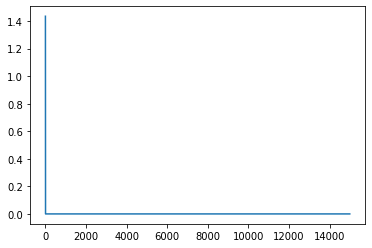

In [111]:
# List of rewards
rewards = []
Convergence_Q=[]
Qk = np.zeros((env.nS, env.nA))
Qk_1 = np.zeros((env.nS, env.nA))
for episode in range(total_episodes):
    state = env.reset()
    step = 0
    terminal = False
    total_rewards = 0
    
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])
        else:
            action = env.action_space.sample()
        n_state, reward, terminal, _ = env.step(action)
        Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[n_state, :]) - Q[state, action])
        total_rewards += reward
        state = n_state
        if terminal:
            Qk_1=Q
            break
            
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    print("Epsilon :", epsilon)
    rewards.append(total_rewards)
    Convergence_Q.append(np.linalg.norm(Qk - Qk_1))
    Qk=Qk_1
print("The Optimal Q function is ", Q)
Policy=[]
for i in range(env.nS):
    Policy.append(np.argmax(Q[i,:]))

print("Optimal Policy", Policy)
print("Convergence of Q")
plt.plot(Convergence_Q)


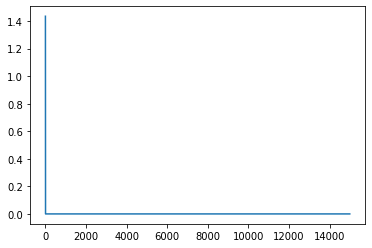

In [112]:
plt.plot(Convergence_Q)

In [99]:
Policy=[]
for i in range(env.nS):
    Policy.append(np.argmax(Q[i,:]))

In [100]:
print("Optimal Policy", Policy)

Optimal Policy [0, 3, 2, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 1, 0]


In [101]:
# Make sure env is declared 
def return_prob(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        if y==A[i][1]:
            return A[i][0]
    # If y is not part of the Range, print 0
    return 0
def return_reward(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        
        if y==A[i][1]:
            return A[i][2]
    
    # If y isn't part of the range
    return 0
      

Norm 0.3333333333333333
Norm 0.0
Value Function [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1        0.
 0.         0.1        0.46333333 0.        ]
Policy [0, 3, 2, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 1, 0]


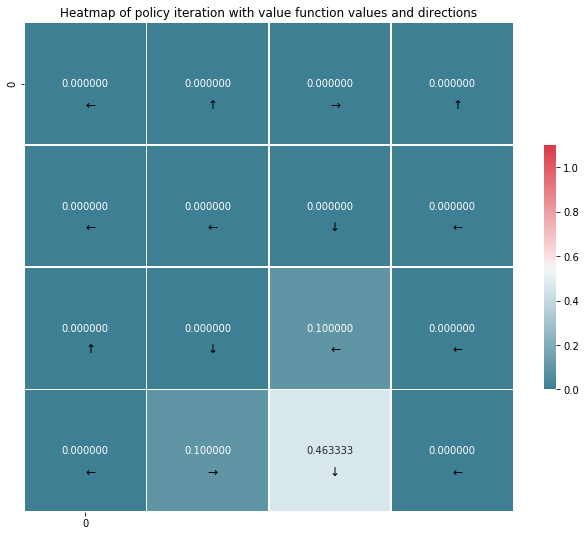

In [102]:
V_k=np.zeros(16)
V_k1=np.zeros(16)
V=np.zeros(16)
V_old=np.copy(V)
## HyperParameter
delta=0.00001
Plt_list=[] # For Plotting Convergence
PIPolicy=np.random.randint(0,env.nA,env.nS)
#print(PIPolicy)
tsum=0
while True:
        for x in range(env.nS):
            a=Policy[x]
            for y in range(env.nS):
                tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
            V[x] = tsum
            tsum=0.0
        #print(V)
        #boo = False
        print("Norm", norm_diff(V_old,V))
        if norm_diff(V_old,V) < delta:
            fancy_visual(V,Policy)
            break
            #Plt_list.append(norm_diff(V_k1,V_k))
            #V_k=V_k1
            #print( "New", V)
#             V_old=V
            #boo, PIPolicy=UpdatePolicy(V, PIPolicy)
            
        else:
            V_old=V